In [34]:
import pandas as pd
import os

obesityDT = pd.read_csv('MSWithInsulin (1).csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Redefinir o índice do DataFrame para iniciar em 0
obesityDT = obesityDT.reset_index(drop=True)
obesityDT.head(5)

,seqn,age,sex,marital_status,annual_income,race,fname,lname,WaistCirc,BMI,albuminuria,UrAlbCr,UricAcid,GGT,ALT,AST,CPK,HOMA,BloodGlucose,BloodInsulin,HDL,Trigylcerides,smoking,Hypertension,Dyslipidemia_HDL,Dyslipidemia,Hyperglycemia,Obesity,MetabolicSyndrome
0,62161,22,Male,single,75000-99999,Non-Hispanic White,Dennis,Kelley,81.0,23.3,0,3.88,4.9,14,19,25,108,2.08814,92,18.65,41,84,Never smoker,0,0,0,0,0,0
1,62164,44,Female,married,45000-54999,Non-Hispanic White,Josephine,Lane,80.1,23.2,0,8.55,4.5,18,29,37,494,1.65886,82,3.51,28,56,Never smoker,0,1,0,0,0,0
2,62169,21,Male,single,5000-9999,Non-Hispanic Asian,Ryan,Hawkins,69.6,20.1,0,5.07,5.4,20,19,17,80,2.82456,107,9.64,43,78,Never smoker,0,0,0,1,0,0
3,62172,43,Female,single,20000-24999,Non-Hispanic Black,Charlotte,Willis,120.4,33.3,0,5.22,5.0,26,17,15,94,2.66839,104,18.62,73,141,Current every day smoker,0,0,0,1,1,0
4,62178,80,Male,widowed,0-4999,Non-Hispanic White,Freddie,Welch,112.5,28.5,0,9.79,4.8,14,13,28,64,2.71996,105,8.97,47,100,Never smoker,0,0,0,1,1,0


In [21]:
# Remover as colunas não necessárias para o algoritmo Apriori do DataFrame
obesityDT = obesityDT.drop(columns=['age', 'sex', 'annual_income', 'race', 'seqn', 'fname', 'lname', 'marital_status', 'smoking'])

In [22]:
obesityDT.head(15)

,WaistCirc,BMI,albuminuria,UrAlbCr,UricAcid,GGT,ALT,AST,CPK,HOMA,BloodGlucose,BloodInsulin,HDL,Trigylcerides,Hypertension,Dyslipidemia_HDL,Dyslipidemia,Hyperglycemia,Obesity,MetabolicSyndrome
0,81.0,23.3,0,3.88,4.9,14,19,25,108,2.08814,92,18.65,41,84,0,0,0,0,0,0
1,80.1,23.2,0,8.55,4.5,18,29,37,494,1.65886,82,3.51,28,56,0,1,0,0,0,0
2,69.6,20.1,0,5.07,5.4,20,19,17,80,2.82456,107,9.64,43,78,0,0,0,1,0,0
3,120.4,33.3,0,5.22,5.0,26,17,15,94,2.66839,104,18.62,73,141,0,0,0,1,1,0
4,112.5,28.5,0,9.79,4.8,14,13,28,64,2.71996,105,8.97,47,100,0,0,0,1,1,0
5,78.6,22.1,0,9.21,5.4,14,17,24,193,1.86733,87,5.80,61,40,0,0,0,0,0,0
6,80.2,22.4,0,8.78,6.7,8,10,15,29,1.69957,83,5.56,48,91,0,1,0,0,0,0
7,97.0,24.7,1,62.14,6.7,55,38,31,493,2.17991,94,12.75,58,182,1,0,1,0,0,0
8,106.0,28.9,0,7.24,8.8,15,48,68,2353,2.51667,101,10.99,40,129,1,1,0,1,1,1
9,82.7,22.2,0,5.53,4.5,9,32,28,96,2.04299,91,4.63,46,62,0,0,0,0,0,0


In [23]:
# Define os valores de referência para cada variável
reference_values = {
    'WaistCirc': 90,  # Exemplo: Valor de referência para circunferência da cintura
    'BMI': 30,  # Exemplo: Valor de referência para índice de massa corporal (IMC)
    'albuminuria': 1,  # Exemplo: Valor de referência para albuminúria
    'UrAlbCr': 30,  # Exemplo: Valor de referência para relação albumina/creatinina na urina
    'UricAcid': 7,  # Exemplo: Valor de referência para ácido úrico
    'GGT': 50,  # Exemplo: Valor de referência para Gama-GT
    'ALT': 35,  # Exemplo: Valor de referência para Alanina Aminotransferase (ALT)
    'AST': 40,  # Exemplo: Valor de referência para Aspartato Aminotransferase (AST)
    'CPK': 170,  # Exemplo: Valor de referência para Creatina Quinase (CPK)
    'HOMA': 2,  # Exemplo: Valor de referência para HOMA-IR
    'BloodGlucose': 100,  # Exemplo: Valor de referência para glicose no sangue
    'BloodInsulin': 20,  # Exemplo: Valor de referência para insulina no sangue
    'HDL': 40,  # Exemplo: Valor de referência para HDL
    'Trigylcerides': 150  # Exemplo: Valor de referência para triglicérides
}

In [24]:
obesityDT.head(5)

,WaistCirc,BMI,albuminuria,UrAlbCr,UricAcid,GGT,ALT,AST,CPK,HOMA,BloodGlucose,BloodInsulin,HDL,Trigylcerides,Hypertension,Dyslipidemia_HDL,Dyslipidemia,Hyperglycemia,Obesity,MetabolicSyndrome
0,81.0,23.3,0,3.88,4.9,14,19,25,108,2.08814,92,18.65,41,84,0,0,0,0,0,0
1,80.1,23.2,0,8.55,4.5,18,29,37,494,1.65886,82,3.51,28,56,0,1,0,0,0,0
2,69.6,20.1,0,5.07,5.4,20,19,17,80,2.82456,107,9.64,43,78,0,0,0,1,0,0
3,120.4,33.3,0,5.22,5.0,26,17,15,94,2.66839,104,18.62,73,141,0,0,0,1,1,0
4,112.5,28.5,0,9.79,4.8,14,13,28,64,2.71996,105,8.97,47,100,0,0,0,1,1,0


In [25]:
# Transforma os dados em binários com base nos valores de referência
for variable, reference_value in reference_values.items():
    obesityDT[variable] = obesityDT[variable] > reference_value

In [26]:
# Inverter a transformação, atribuindo 1 para 'True' e 0 para 'False'
obesityDT = obesityDT.apply(lambda x: (x == True).astype(int))

In [27]:
obesityDT.head(5)

,WaistCirc,BMI,albuminuria,UrAlbCr,UricAcid,GGT,ALT,AST,CPK,HOMA,BloodGlucose,BloodInsulin,HDL,Trigylcerides,Hypertension,Dyslipidemia_HDL,Dyslipidemia,Hyperglycemia,Obesity,MetabolicSyndrome
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0


In [28]:
# Converter todas as colunas do DataFrame para tipos de dados booleanos
obesityDT= obesityDT.astype(bool)

In [29]:
obesityDT.head(5)

,WaistCirc,BMI,albuminuria,UrAlbCr,UricAcid,GGT,ALT,AST,CPK,HOMA,BloodGlucose,BloodInsulin,HDL,Trigylcerides,Hypertension,Dyslipidemia_HDL,Dyslipidemia,Hyperglycemia,Obesity,MetabolicSyndrome
0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False
3,True,True,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,True,False
4,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,True,False


In [30]:
# Importar a biblioteca mlxtend para Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Aplicar o algoritmo Apriori para encontrar itens frequentes com um suporte mínimo
frequent_itemsets = apriori(obesityDT, min_support=0.1, use_colnames=True)

# Gerar regras de associação com uma confiança mínima
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Remover as colunas especificadas permanentemente
rules = rules.drop(['antecedent support', 'consequent support', 'leverage', 'zhangs_metric'], axis=1)

# Exibir as regras de associação formatadas como CSV no console
print(rules.head(5).to_string(index=False))

# Configurar o Pandas para exibir todas as linhas e colunas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# Exibir as regras de associação formatadas como CSV no console
#print(rules.to_string(index=False))


antecedents consequents  support  confidence     lift  conviction
(WaistCirc)       (BMI) 0.355636    0.518769 1.452403    1.335783
      (BMI) (WaistCirc) 0.355636    0.995677 1.452403   72.745582
 (UricAcid) (WaistCirc) 0.118374    0.874525 1.275677    2.506168
      (ALT) (WaistCirc) 0.112712    0.799270 1.165902    1.566593
      (CPK) (WaistCirc) 0.176016    0.753304 1.098851    1.274695


In [31]:
# Contagem para cada coluna
column_counts = {}

for column in obesityDT.columns:
    column_counts[column] = obesityDT[column].value_counts()

# Criar um DataFrame a partir dos resultados da contagem
column_counts_df = pd.DataFrame(column_counts)

# Exibir os resultados como tabela formatada
print("\nContagem de itens em cada coluna:\n")
print(column_counts_df.to_string(index=False))



Contagem de itens em cada coluna:

 WaistCirc  BMI  albuminuria  UrAlbCr  UricAcid  GGT  ALT  AST  CPK  HOMA  BloodGlucose  BloodInsulin  HDL  Trigylcerides  Hypertension  Dyslipidemia_HDL  Dyslipidemia  Hyperglycemia  Obesity  MetabolicSyndrome
       611 1249         1897     1703      1680 1761 1669 1840 1489   381          1026          1601  359           1460          1193              1366          1456            965      888               1250
      1332  694           46      240       263  182  274  103  454  1562           917           342 1584            483           750               577           487            978     1055                693


In [32]:
import pandas as pd

# Configurar o pandas para exibir todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Verificar os nomes das colunas no seu DataFrame
print(obesityDT.columns)

# Se a coluna se chamar 'Obesity', então continue com o seguinte código
if 'Obesity' in obesityDT.columns:
    # Filtrar o DataFrame para incluir apenas as linhas onde 'Obesity' é igual a 1
    obesityDT_filtered = obesityDT[obesityDT['Obesity'] == 1]

    # Contagem para cada coluna
    column_counts = {}

    for column in obesityDT_filtered.columns:
        column_counts[column] = obesityDT_filtered[column].value_counts()

    # Exibir os resultados
    for column, count in column_counts.items():
        print(f"Contagem para '{column}':\n{count}\n")

    # Criar um DataFrame a partir dos resultados da contagem
    column_counts_df = pd.DataFrame(column_counts)

    # Exibir os resultados como tabela formatada
    print("\nContagem de itens em cada coluna:\n")
    print(column_counts_df)
else:
    print("A coluna 'Obesity' não foi encontrada no DataFrame.")
    
# Calcula a porcentagem de valores True para cada coluna
percentage_true = (obesityDT == 1).mean()

# Filtra as colunas onde a porcentagem de True é maior que 55%
filtered_columns = percentage_true[percentage_true > 0.5].index

# Filtra o DataFrame original
filtered_data = obesityDT[filtered_columns]

# Exibe as contagens apenas para as colunas filtradas
for column in filtered_data.columns:
    count = filtered_data[column].value_counts()
    print(f"Contagem para '{column}':\n{count}\n")

Index(['WaistCirc', 'BMI', 'albuminuria', 'UrAlbCr', 'UricAcid', 'GGT', 'ALT',
       'AST', 'CPK', 'HOMA', 'BloodGlucose', 'BloodInsulin', 'HDL',
       'Trigylcerides', 'Hypertension', 'Dyslipidemia_HDL', 'Dyslipidemia',
       'Hyperglycemia', 'Obesity', 'MetabolicSyndrome'],
      dtype='object')
Contagem para 'WaistCirc':
True     1031
False      24
Name: WaistCirc, dtype: int64

Contagem para 'BMI':
True     671
False    384
Name: BMI, dtype: int64

Contagem para 'albuminuria':
False    1025
True       30
Name: albuminuria, dtype: int64

Contagem para 'UrAlbCr':
False    898
True     157
Name: UrAlbCr, dtype: int64

Contagem para 'UricAcid':
False    884
True     171
Name: UricAcid, dtype: int64

Contagem para 'GGT':
False    942
True     113
Name: GGT, dtype: int64

Contagem para 'ALT':
False    894
True     161
Name: ALT, dtype: int64

Contagem para 'AST':
False    997
True      58
Name: AST, dtype: int64

Contagem para 'CPK':
False    808
True     247
Name: CPK, dtype: int64



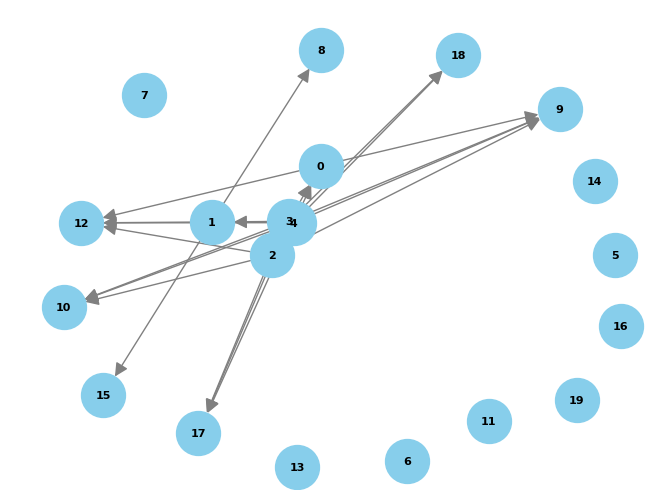

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Seus dados
data = [
    [False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, True, False, False],
    [True, True, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, True, True, False],
    [True, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, True, True, False]
]

# Criar um grafo dirigido
G = nx.DiGraph()

# Adicionar nós ao grafo
for i in range(len(data[0])):
    G.add_node(i)

# Adicionar arestas ao grafo
for i in range(len(data)):
    for j in range(len(data[i])):
        if data[i][j]:
            G.add_edge(i, j)

# Layout do grafo
pos = nx.spring_layout(G)

# Desenhar o grafo
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, font_size=8, edge_color='gray', arrowsize=20)

# Exibir o gráfico
plt.show()
